In [72]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Thống kê

In [73]:
# đọc file data
df=pd.read_csv('raw_data.csv')
df = df.drop("link", axis=1)


### Số rows, columns

In [74]:
# mô tả các thống kê tổng quan về tập dữ liệu
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          9999 non-null   object 
 1   author         9999 non-null   object 
 2   language       9788 non-null   object 
 3   avg_ratings    9999 non-null   float64
 4   ratings_count  9999 non-null   object 
 5   reviews_count  9999 non-null   object 
 6   publisher      9627 non-null   object 
 7   publish_year   9938 non-null   float64
 8   num_pages      9875 non-null   float64
 9   page_format    9955 non-null   object 
 10  genres         9999 non-null   object 
dtypes: float64(3), object(8)
memory usage: 859.4+ KB
None


=> ratings_count và reviews_count sai định dạng

### Clean data

In [75]:
# Dữ liệu của hai cột ratings_count và reviews_count là dạng int và trong dữ liệu có dấu phẩy nên sai định dạng
df['ratings_count'] = df['ratings_count'].apply(lambda x: int(x.replace(',', '')))
df['reviews_count'] = df['reviews_count'].apply(lambda x: int(x.replace(',', '')))

In [76]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          9999 non-null   object 
 1   author         9999 non-null   object 
 2   language       9788 non-null   object 
 3   avg_ratings    9999 non-null   float64
 4   ratings_count  9999 non-null   int64  
 5   reviews_count  9999 non-null   int64  
 6   publisher      9627 non-null   object 
 7   publish_year   9938 non-null   float64
 8   num_pages      9875 non-null   float64
 9   page_format    9955 non-null   object 
 10  genres         9999 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 859.4+ KB
None


In [77]:
# ghi lại vào file data clean csv
df.to_csv("./data_10000.csv", index=False)

### Missing data

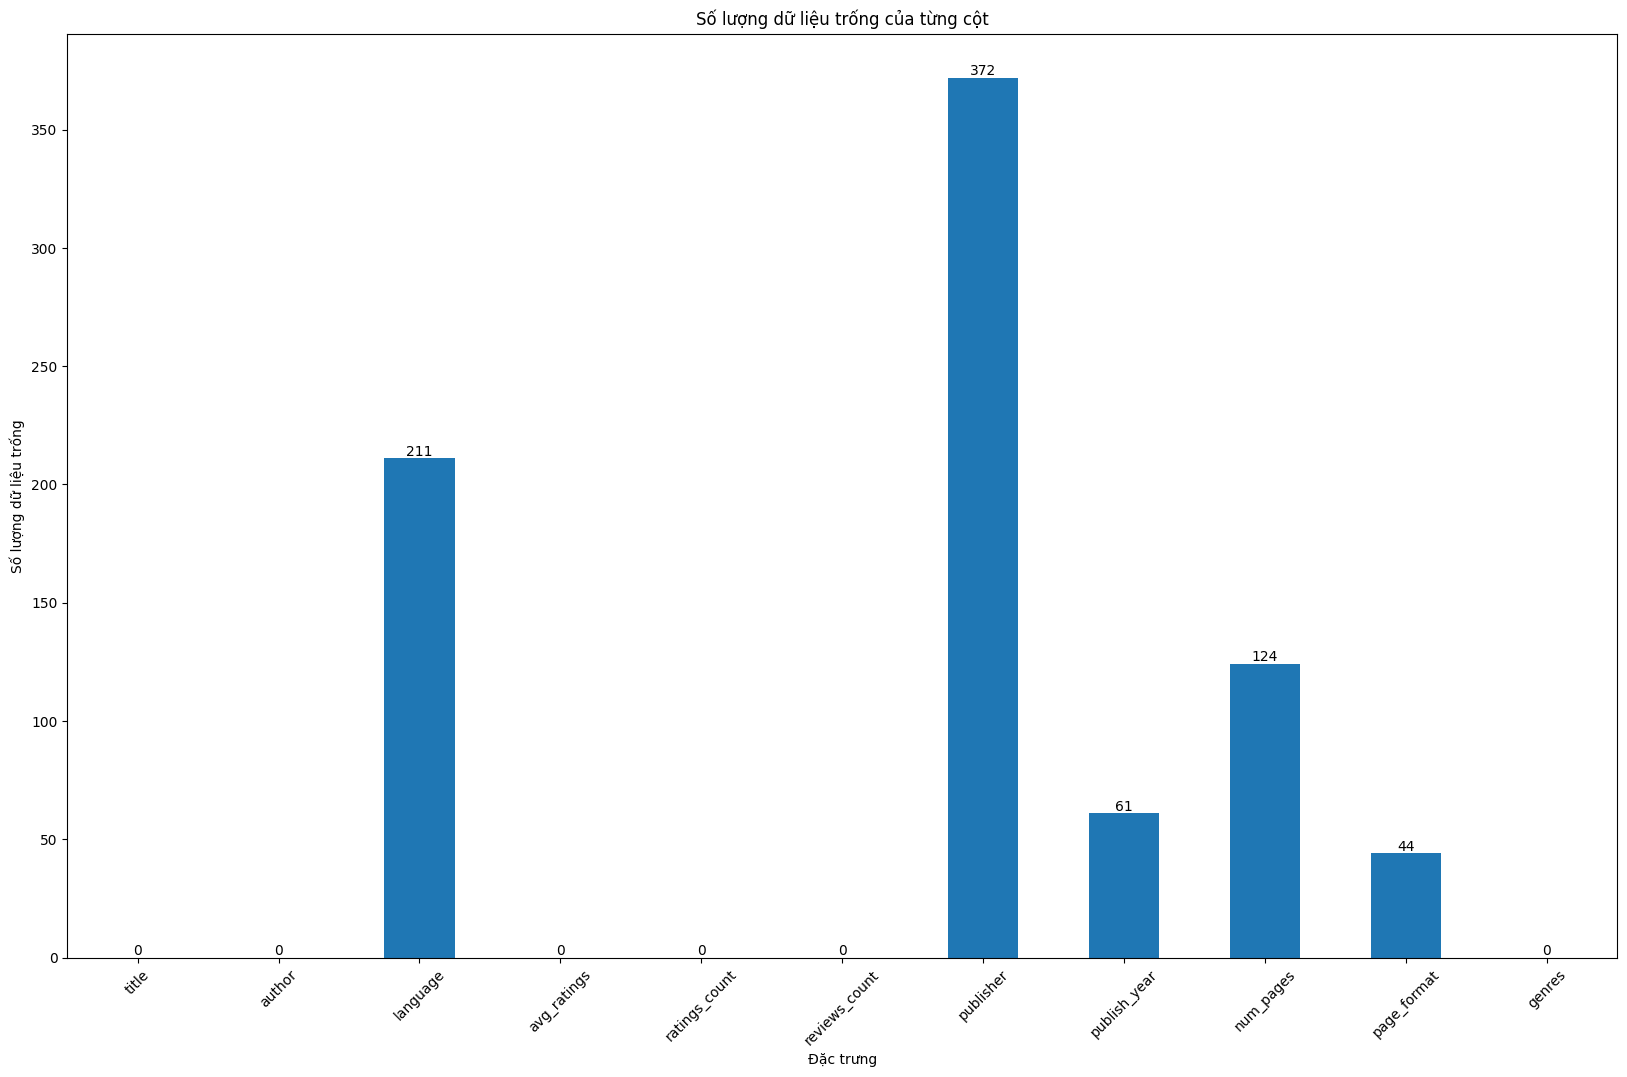

In [78]:
# Tạo một series chứa số lượng dữ liệu trống của từng cột
missing_data = df.isnull().sum()

# Tạo biểu đồ cột
plt.figure(figsize=(20, 12))
missing_data.plot(kind='bar')
plt.title('Số lượng dữ liệu trống của từng cột')
plt.xlabel('Đặc trưng')
plt.ylabel('Số lượng dữ liệu trống')
plt.xticks(rotation=45)

# Thêm số trên đỉnh của mỗi cột
for i, value in enumerate(missing_data):
    plt.annotate(str(value), xy=(i, value), ha='center', va='bottom')

plt.show()

## Mô tả dữ liệu

### Phân bố dữ liệu của trường dự đoán avg_ratings

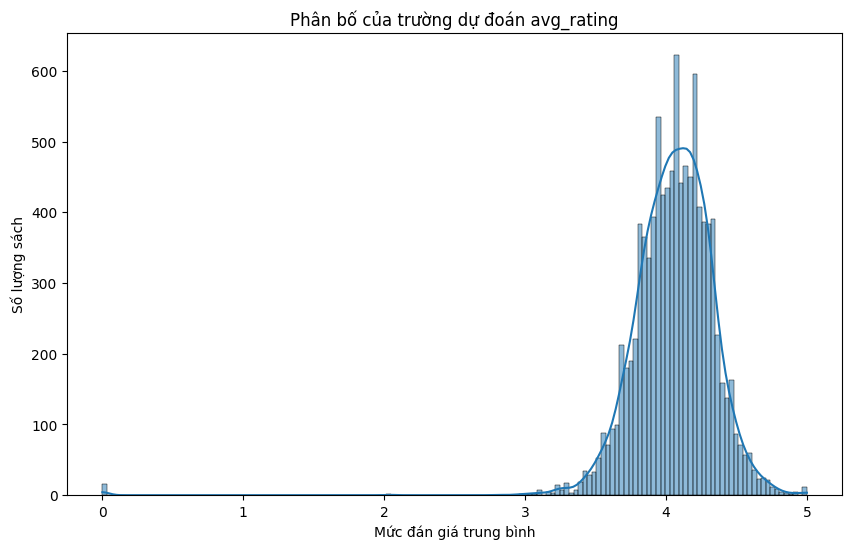

In [79]:
# Vẽ biểu đồ phân bố của biến 'avg_rating'
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='avg_ratings', kde=True)
plt.title('Phân bố của trường dự đoán avg_rating')
plt.xlabel('Mức đán giá trung bình')
plt.ylabel('Số lượng sách')
plt.show()

- Nhận xét

### độ tương quan giữa avg_ratings với các biến ratings_count, review_count, publish_year, nums_page

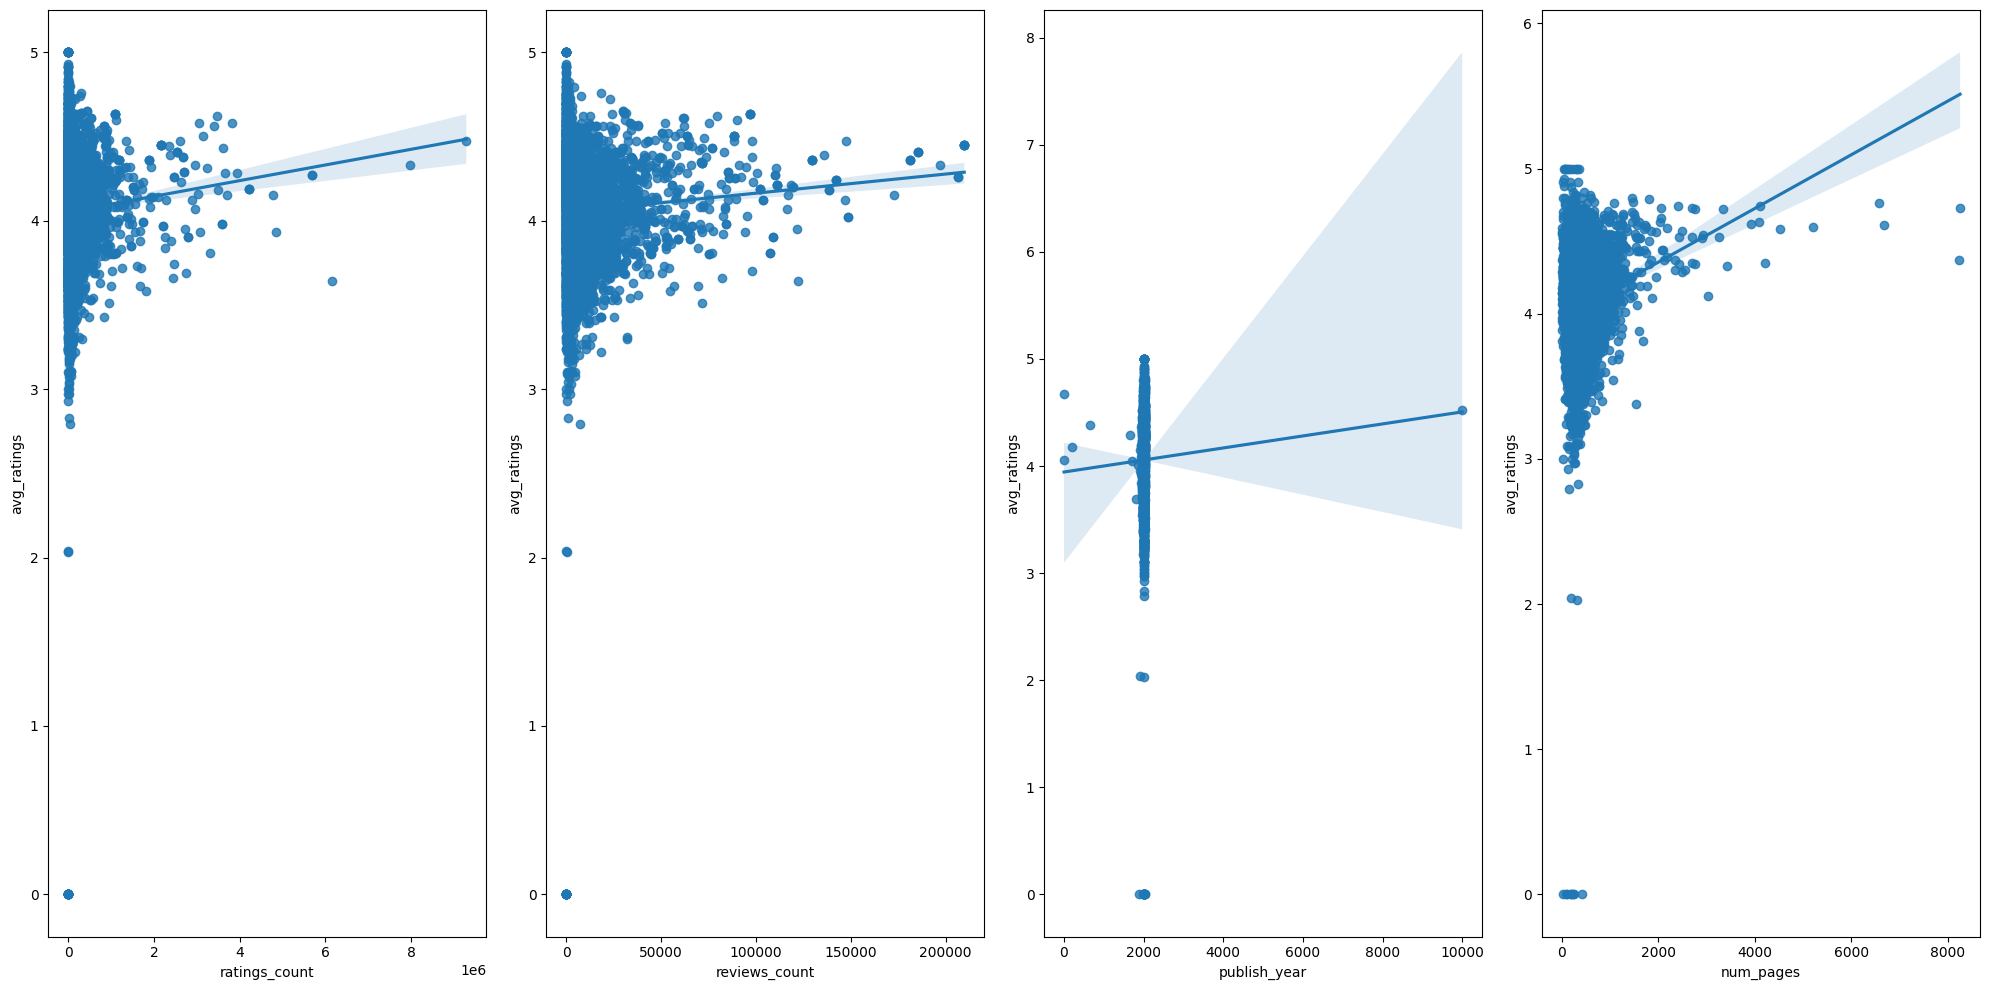

In [80]:
fig, ax = plt.subplots(1, 4, figsize=(20,10))

ax1 = plt.subplot(141)
ax1 = sns.regplot(data=df, y='avg_ratings', x='ratings_count')
ax2 = plt.subplot(142)
ax2 = sns.regplot(data=df, y='avg_ratings', x='reviews_count')
ax3 = plt.subplot(143)
ax3 = sns.regplot(data=df, y='avg_ratings', x='publish_year')
ax4 = plt.subplot(144)
ax4 = sns.regplot(data=df, y='avg_ratings', x='num_pages')
plt.tight_layout()

- tất cả biếu đồ đề có sự tương quan dương giữa các biến với avg_ratings, tuy nhiên các biến có độ tương qua khá thấp với biến num_page có độ tương quan dương cao nhất

###	Tương quan giữa cột số lượng của ngôn ngữ so với avg_rating

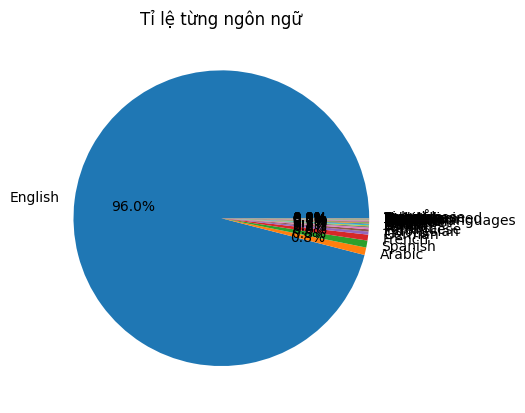

In [81]:
# Tạo danh sách các ngôn ngữ và số lượng tương ứng
languages = df['language'].value_counts().index.tolist()
counts = df['language'].value_counts().values.tolist()
# Vẽ biểu đồ tròn
plt.pie(counts, labels=languages, autopct='%1.1f%%')
# Đặt tiêu đề
plt.title("Tỉ lệ từng ngôn ngữ")
# Hiển thị biểu đồ
plt.show()

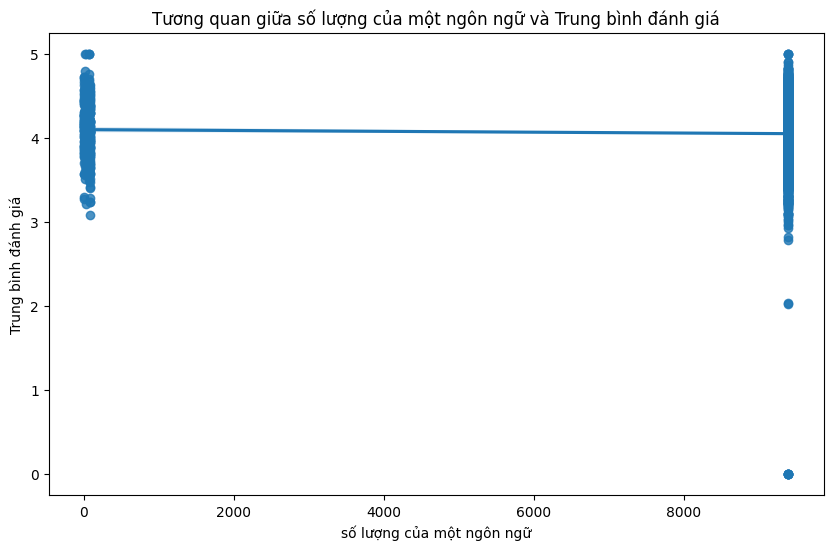

In [82]:
# tạo đặc trưng mới
df['count_books_by_language'] = df.groupby('language')['language'].transform('count')
# Vẽ biểu đồ tương quan với sns.regplot()
plt.figure(figsize=(10, 6))
sns.regplot(data=df, y='avg_ratings', x='count_books_by_language')
plt.title('Tương quan giữa số lượng của một ngôn ngữ và Trung bình đánh giá')
plt.xlabel('số lượng của một ngôn ngữ')
plt.ylabel('Trung bình đánh giá')

plt.show()

- Ngôn ngữ English chiếm 96.1% và thông qua biểu đồ scatter plot  thấy có thể thấy biến languae không có sự tương quan với avg_rating 

=> không sử dụng cột language


### Tương quan giữa biến avg_ratings và số lượng sách của tác giả 

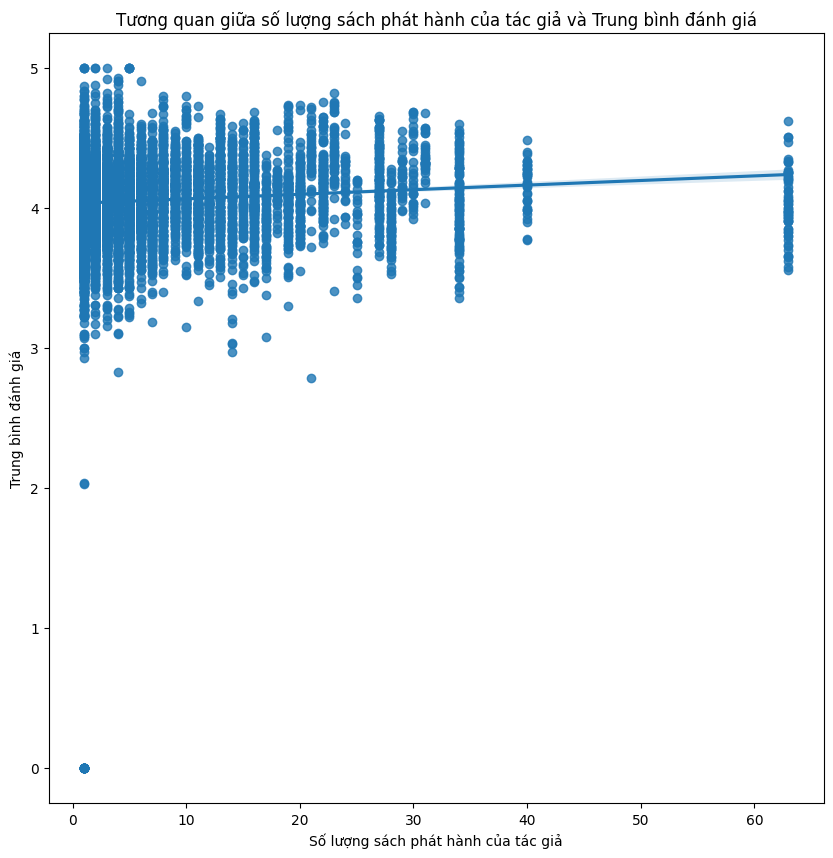

In [83]:
# tạo đặc trưng mới
df['count_books_by_author'] = df.groupby('author')['author'].transform('count')
# Vẽ biểu đồ tương quan với sns.regplot()
plt.figure(figsize=(10, 10))
sns.regplot(data=df, y='avg_ratings', x='count_books_by_author')
plt.title('Tương quan giữa số lượng sách phát hành của tác giả và Trung bình đánh giá')
plt.xlabel('Số lượng sách phát hành của tác giả')
plt.ylabel('Trung bình đánh giá')
plt.show()

- Tạo biến từ số lượng sách của một tác giả ta thấy biểu đồ scatter plot có sự tương quan dương giứa số lượng sách của một tác giả và biến dự đoán 
=> ta có thể sử dụng biến làm đặc trưng mới để dự đoán.